ch2. ANN
---------

- 인공신경망은 입력, 은닉, 출력 계층으로 구성
- 은닉 계층은 한 개 이상 포함 할 수 있다.
- 각 계층은 여러 노드로 구성
- ANN은 SNN(Shallow NN, 얕은 신경망)으로 부르기도 함

## 2.1 ANN 원리

### 2.1.1 ANN 개념
- 은닉 계층을 포함하는 신경망 기술
- 초기에는 은닉 계층 한 개
- 처리할 데이터양이 늘어나거나 비정형 데이터인 경우는 복잡도가 높아져 활용하기 어려운데 ANN이 효과적

### 2.1.2 ANN 구조
- ANN은 입력 계층, 은닉 계층, 출력 계층으로 구성되고 각 계층은 순서별로 여러 입력 노드, 은닉 노드, 출력 노드를 포함

#### 1단계
- 입력 계층을 통해 외부로부터 들어온 입력 신호 벡터(x)에 가중치 행렬 Wxh를 곱하여 은닉 계층으로 보냄
- 입력 노드 중 하나에는 외부 정보가 아니라 상수 1이 항상 들어옴
- 이 상수 입력은 편향값 보상에 사용

#### 2단계
- 은닉 계층의 각 노드들은 자신에게 입력된 신호 벡터에 활성화 함수(activation function)을 적용한 결과 벡터(h)로 내보냄
- 뉴런의 동작을 흉내 내고 비선형성을 보상하는 활성화 함수로 시그모이드, 하이퍼볼릭탄젠트 함수 등을 사용

#### 3단계
- 은닉 계층의 결과 벡터에 새로운 가중치 행렬 Why를 곱한 뒤 출력 계층으로 보냄

#### 4단계
- 출력 계층으로 들어온 신호 벡터에 출력 활성화 함수인 f를 적용하고 그 결과 벡터를 신경망 외부로 최종 출력
- 분류의 경우에는 출력용 활성화 함수로 소프트맥스(Softmax) 연산을 주로 사용, 일반적인 회귀 방식에는 사용하지 않음

### 2.1.3 ANN 활용
분류와 회귀로 나눌 수 있다.

#### 분류
- 입력 정보를 클래스별로 분류하는 방식
- 숫자 0~9를 구별
- 분류 문제에서는 분류 할 항목 만큼 노드를 생성하는 것이 효과적이라고 함
  - 0 / 1을 구분해야 하는 문제라면 두 개의 노드를 생성해서 구현
  - 판별을 어느 쪽이 더 큰 값인지 확인하여 분류함

분류 과정
- 정방향 예측
  - 예측값을 추론하는 과정
- 역전파
  - back propagation
  - 가중치의 학습은 예측값의 목푯값에 대한 오차를 역방향으로 되돌리면서 이루어짐
- 오차를 줄이는 방법?
  - gradient descent(경사 하강법)
    - 가중치에 대한 손실 함수를 미분하고, 그 미분값의 방향과 크기를 활용해 가중치를 보상하는 방법
  - loss function?
    - 손실 함수
    - 가중치에 따라 오차가 얼마나 커지거나 작아지는지 평가하는 함수
    - ANN은 주로 cross-entropy를 loss function으로 활용함, 이것을 활용하려면 출력 노드의 결과를 확률값으로 바꿔야 함
    - 그래서 확률 출력 노드값을 softmax를 적용하여 구함

cross_entropy에 대한 이해
- https://m.blog.naver.com/PostView.nhn?blogId=yonggeol93&logNo=221230536533&proxyReferer=https%3A%2F%2Fwww.google.com%2F
- http://blog.naver.com/PostView.nhn?blogId=gyrbsdl18&logNo=221013188633&parentCategoryNo=3&categoryNo=&viewDate=&isShowPopularPosts=true&from=search
- https://hyunw.kim/blog/2017/10/26/Cross_Entropy.html


#### 회귀
- 입력 정보로 다른 값을 예측하는 방식
- 평균 온도 예측, 집 값 예측

회귀 과정
- 분류와 마찬가지로 back propagation을 활용함
- loss function으로 'mse'(mean square error)를 활용함
- 오차를 줄이는 최적화 방법으로 SGD를 사용하나, 최근에는 더 나은 기술이 적용됨
  - Adam : 경사의 분산과 평균으로부터 파라미터를 업데이트하는 적응 알고리즘
  - Adagrad : 밀집되지 않은 데이터에 적합하도록 경사 제곱을 통해 시간에 따라 학습률을 조정하는 적응 알고리즘

### 2.2 필기체를 구분하는 분류 ANN 구현

### 2.2.1 분류 ANN을 위한 인공지능 모델 구현

#### ANN 구현 6단계


1. 분류 ANN 구현용 패키지 불러오기
2. 분류 ANN에 필요한 파라미터 설정
3. 분류 ANN 모델 구현
4. 학습과 성능 평가용 데이터 불러오기
5. 분류 ANN 학습 및 검증
6. 분류 ANN 학습 결과 분석

### 1단계
- layers
  - 각 계층을 만드는 모듈
- models
  - 각 layers들을 연결하여 신경망 모델을 만든 후, 컴파일하고, 학습시키는 역할
  - 학습 후 평가도 models를 이용하여 진행
  - models.Model 객체에서 compile(), fit(), predict(), evalute() 등 다양하게 지원

In [1]:
from keras import layers, models

Using TensorFlow backend.


### 2단계
ANN에 필요한 파라미터 설정

- Nin : 입력 계층의 노드 수, N이 in 한다로 기억하면 쉽네
- Nh : 은닉 계층의 노드 수, 은닉(hidden)의 노드 수 N
- number_of_class : 출력값이 가질 클래스 수
- Nout : 출력 노드, 출력(out)의 노드 수 N

### 3단계 - 모델링 파트
연쇄 방식과 분산 방식으로 구현 가능, 양 쪽 방식 모두를 아는 것이 낫다.

- 연쇄 방식은 간단히 구현 할 수 있지만, 복잡도가 높은 모델에 적용하기에는 한계
- 이 책에서는 분산 방식 모델링(함수형, 객체지향형), 연쇄 방식 모델링(함수형, 객체지향형) 을 다룰 예정
-------------

#### 분산 방식 모델링 - 함수형

In [5]:
# 신경망 구조 지정 - 입력 계층 정의

x = layers.Input(shape=(Nin,))

- 입력 계층은 layers.Input() 함수로 지정
- 원소를 Nin개 가지는 입력 신호 벡터는 입력 노드의 따른 계층의 shape을 (Nin,)으로 지정

In [3]:
layers.Input?

Signature:
layers.Input(
    shape=None,
    batch_shape=None,
    name=None,
    dtype=None,
    sparse=False,
    tensor=None,
)
Docstring:
`Input()` is used to instantiate a Keras tensor.

A Keras tensor is a tensor object from the underlying backend
(Theano, TensorFlow or CNTK), which we augment with certain
attributes that allow us to build a Keras model
just by knowing the inputs and outputs of the model.

For instance, if a, b and c are Keras tensors,
it becomes possible to do:
`model = Model(input=[a, b], output=c)`

The added Keras attributes are:
    `_keras_shape`: Integer shape tuple propagated
        via Keras-side shape inference.
    `_keras_history`: Last layer applied to the tensor.
        the entire layer graph is retrievable from that layer,
        recursively.

# Arguments
    shape: A shape tuple (integer), not including the batch size.
        For instance, `shape=(32,)` indicates that the expected input
        will be batches of 32-dimensional vectors.
    ba

In [ ]:
# 은닉 계층의 구조와 수

h = layers.Activation('relu')(layers.Dense(Nh)(x))

- 은닉 계층은 layers.Dense()로 지정
- 노트가 Nh개인 경우에 layers.Dense(Nh)로 구성
- 이 은닉 계층의 입력은 입력 노드임
  - 즉, x를 입력으로 받아들이도록 layers.Dense(Nh)(x)로 지정
  
활성화 함수를 layers.Activation('relu')로 지정
- relu : f(x) = max(x, 0)

정리하면 입력 벡터인 x를 완전히 연결된 은닉 계층의 노드들로 모두 보내고 은닉 계층의 각 노드들은 ReLu로 활성화 처리한 뒤에 다음 계층으로 보냄

In [ ]:
# 출력 계층

# 다중 클래스 분류를 ANN으로 구현하므로 출력 노드 수는 클래스 수로 지정(출력 노드에 입력 되는 정보는 은닉 노드의 출력값)
y = layers.Activation('softmax')(layers.Dense(Nout)(h))

- 다중 클래스 분류를 ANN으로 구현하므로 출력 노드 수는 클래스 수로 지정
- 이 때, 출력 노드에 입력 되는 정보는 은닉 노드의 출력값
- 분류의 경우에 출력 노드의 활성화 함수로 소프트맥스 연산을 사용

In [ ]:
# 모델 구현, 중간 계층은 알아서 자동 설정

model = models.Model(x, y)

- 모델은 입력과 출력을 지정하여 만듬
- 중간 계층들은 앞서 정의한 계층 간 신호의 연결 관계대로 자동 설정
- 여러 가지 필요한 함수와 자동 연계되도록 역할함

캐라스는 컴파일을 수행하여 타깃 플랫폼에 맞게 딥러닝 코드를 구성
- 파이썬은 스크립트 언어이기 때문에 컴파일 없어도 됨
- 그러나 케라스의 내부 딥러닝 엔진이 최적화를 위해 컴파일해 수행 속도 최적화
- GPU 쓴다면 엔비디아 CUDA 컴파일러를 이용해 실행 코드 만들고, 텐서플로이면 코드를 컴파일 하지는 않지만 다양한 초기화 작업을 진행

In [ ]:
# model compile 과정

model.compile(
    loss='categorical_crossentropy', # loss function 지정
    optimizer='adam',   # 최적화 함수 지정
    metrics=['accuracy']   # 학습, 예측 및 성능 검증의 정확성 측정
)

-------

#### 연쇄 방식 모델링 - 함수형

- 연쇄 방식은 분산 방식과 모델을 지정하는 부분만 다르고, 상수를 정의하고 설정한 모델을 컴파일하는 구현 코드는 동일
- 분산 방식과 다르게 모델을 먼저 설정

In [6]:
model = models.Sequential()

- 첫 번째 add : 입력 계층과 은닉 계층의 형태가 동시에 정해짐
- 입력 노드 Nin개는 완전 연결 계층 Nh개로 구성된 은닉 계층으로 보내짐
- 두 번째 add :은닉 계층의 출력이 출력이 nout인 출력 노드로 전달, 활성화 함수는 softmax

In [ ]:
model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
model.add(layers.Dense(Nout, activation='softmax'))

- 연쇄 방식은 추가되는 계층을 기술할 때 간편하게 기술할 수 있는 장점이 있음
- 복잡한 경우는 연쇄형으로 구현이 힘든 경우도 있음
  - 이럴 경우 분산 방식 모델링을 선택해야 함

--------
#### 분산 방식 모델링 - 객체지향형

코드의 재상용성을 높이기 위해 객체지향 방식으로 구현 가능

In [8]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        
        # set the activation function
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements x -> h -> y
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y) # 상속 받은 부모 클래스의 초기화 진행
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

In [10]:
model = ANN_models_class(Nin, Nh, Nout)

- init 함수에는 입력 계층, 은닉 계층, 출력 계층의 노드 수를 받는다.
  - 각각 Nin, Nh, Nout으로 받는다.

- 은닉 계층이 여러 개라면 반복문 사용해서 생성할 수 있다. 예를 들면....

case 1.
```python
Nh_1 = [5, 10, 5]

hidden_layers = map(layers.Dense, Nh_1)
```

case 2.
```python
Nh_1 = [5, 10, 5]

hidden_layers = [layers.Dense(n) for n in Nh_l]
```

case 3.
```python
hidden_layers = []
for n in Nh_1:
    hidden_layers.append(layers.Dense(n))
```

- 노드 수가 Nout개인 출력 계층을 정의
- activation function을 각각 정의해준다.
- 그 후 상속받은 부모 클래스의 초기화를 진행
  - 부모 클래스는 models.Model


Python에서 super()의 기능에 대해 간단 설명

- https://programmers.co.kr/learn/courses/2/lessons/330
- 자식클래스에서 부모클래스의 내용을 사용하고 싶은 경우
- super().부모클래스내용


```python
class Animal( ):
    def __init__( self, name ):
        self.name = name

class Human( Animal ):
    def __init__( self, name, hand ):
        super().__init__( name ) # 부모클래스의 __init__ 메소드 호출
        self.hand = hand

person = Human( "사람", "오른손" )
```
  

#### 연쇄 방식 모델링 - 객체지향형
- Sequential 방식을 사용하면 더 편리하게 모델링 가능
- 연쇄 방식은 객체지향으로 구성할 수도 있고, 클래스 없이 기본 형태로 구성할 수도 있다.
  - 단, 이때는 신경망 모델이 연속적인 하나의 고리로 연결되어 있다는 가정하에 모델링이 이루어짐
- 각 층의 동작 단계가 연속으로 기술되기 때문에 표현하기도 쉽고 개념적으로 이해하기 쉬움
- 그러나, 딥러닝 구조가 복잡해지면 계층 간의 연결이 연쇄적으로 구성되지 않는 경우가 생길 수 있다.
  - 이럴 경우 직접 모델링 하는 방법이 권장됨

- models.Model -> models.Sequential
- 직접 모델링 방법에서는 컴파일 하기 직전에 초기화 했음
  - 연쇄 방식에서는 부모 클래스의 초기화 함수를 자신의 초기화 함수 가장 앞 단에서 부름
  
모델링은 앞의 계층에 새로운 계층을 계속 추가하는 형태
- 연쇄 방법은 입력 계층을 별도로 정의하지 않고 은닉 계층부터 추가해나감

은닉 계층을 붙일 때, 변수 중에 하나로 입력 계층의 노드 수를 input_shape=(Nin,)을 포함시켜 간단하게 입력 계층 정의함

In [11]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(
            loss='categorical_crossentropy',
            optimizer='adam', 
            metrics=['accuracy']
        )

### 2.2.2 분류 ANN에 사용할 데이터 불러오기

1. 데이터 처리에 사용할 패키지 임포트
2. 데이터 불러오기
3. 출력값 변수를 이진 벡터 형태로 바꾸기
4. 이미지를 나타내는 argument를 1차원 벡터 형태로 바꾸기
5. ANN을 위해 입력값들을 정규화(regularization) 하기

In [12]:
# load data

import numpy as np
from keras import datasets # mnist
from keras.utils import np_utils # to_categorical

In [45]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

딥러닝에 사용되는 데이터는 활용 방향에 따라 크게 3가지로 나뉨
- training
  - 모델을 학습하는데 사용
- validation
  - 학습이 진행되는 동안 성능을 검증하는 데 사용되는 데이터
- test
  - 학습을 마치고 나서 모델의 성능을 최종적으로 평가하는 데 사용하는 데이터

In [46]:
# 0부터 9까지의 숫자로 구성된 출력값을 0과 1로 표현되는 벡터 10개로 바꾸기

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# why?
# 분류 작업 시 정수보다 이진 벡터로 출력 변수를 구성하는 것이 효율적

In [47]:
# X_train, X_test에 (x, y)축에 대한 픽셀 정보가 들어 있는 3차원 데이터인 실제 학습 및 평가용 이미지를 2차원으로 조정
# X_train.shape = (60000, 28, 28)

L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)

#### reshape(-1, n)?은 무엇일까

- https://rfriend.tistory.com/345
- 쉽게 이해한 건 어떤 행렬을 자동으로 배열 해준다는 것
- (4,3) -> reshape(-1, 4) -> (3, 4)
- -1과 4가 있으면 예시의 12개 중 4개를 열로 잡고 행은 자동으로 3만큼 배정된다.
- 행렬의 열 수가 W * H로 지정되어 있으니 행은 전체 원소 수에서 W * H를 자동으로 나누어줌

```python
arr = np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])

arr.shape : (4, 3)
    
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

arr.reshape(-1, 4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])
```

In [62]:
X_train.shape

(60000, 784)

In [49]:
# 학습 데이터 셋 샘플 L개
# L * W * H의 텐서로 저장된 상태
# 멤버 변수 shape에는 2D 이미지 데이터를 저장하는 저장소 규격 있음, 이를 ANN으로 학습하려면 벡터 이미지 형태로 변경, reshape사용
# -1은 행렬의 행을 자동으로 설정

In [48]:
# ANN 최적화를 위한 argument, 값을 0~1사이의 실수로 바꿈

X_train = X_train / 255.0
X_test = X_test / 255.0

#### 2.2.3 분류 ANN 학습 결과 그래프 구현
- 하이퍼파라미터는 인공신경망을 학습하기 전에 사람이 지정해주어야 하는 변수
- 학습이 진행되는 동안 측정한 손실과 정확도의 추이를 관찰하여 이루어짐
- fit() 함수의 결과인 history 변수에 저장되어 있음

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [55]:
# loss function graph

def plot_loss(history):
    plt.plot(history.history['loss'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_loss']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [56]:
# accuracy graph

def plot_acc(history):
    plt.plot(history.history['acc'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_acc']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

#### 2.2.4 분류 ANN 학습 및 성능 분석

In [59]:
def main():
    Nin = 784 # 입력 Nin
    Nh = 100 # 은닉 계층 노드 수
    number_of_class = 10 # 분류 할 갯수(classification)
    Nout = number_of_class # 출력 할 값
    
    model = ANN_seq_class(Nin, Nh, Nout) # Sequential class
    (X_train, y_train), (X_test, y_test) = Data_func() # dataset
    
    history = model.fit(
        X_train, 
        Y_train, 
        epochs=5, # 전체 반복 횟수
        batch_size=100, # 한 번 진행할 때 데이털르 얼마씩 나눠서 넣을지 지정하는 값
        validation_split=0.2 # 검증 데이터 셋
    )
    
    
    # model 평가

    performance_test = model.evaluate(X_test, Y_test, batch_size=100) # batch size에서도 한 번에 계산할 데이터 길이를 지정
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()
    
    return history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 61us/step - loss: 0.3957 - acc: 0.8909 - val_loss: 0.2144 - val_acc: 0.9406
Epoch 2/5
48000/48000 [==============================] - 1s 31us/step - loss: 0.1896 - acc: 0.9462 - val_loss: 0.1594 - val_acc: 0.9538
Epoch 3/5
48000/48000 [==============================] - 1s 30us/step - loss: 0.1411 - acc: 0.9602 - val_loss: 0.1327 - val_acc: 0.9612
Epoch 4/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.1106 - acc: 0.9684 - val_loss: 0.1210 - val_acc: 0.9638
Epoch 5/5
10000/10000 [==============================] - 0s 11us/step
Test Loss and Accuracy -> [0.10254214589716866, 0.9693000048398972]


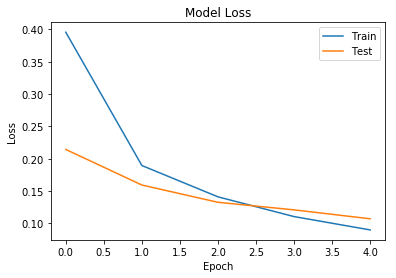

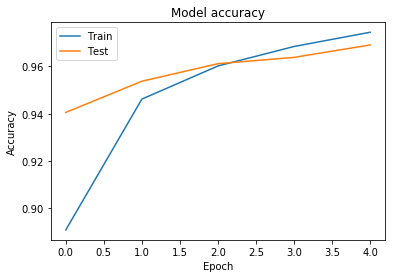

In [60]:
result = main()

In [61]:
result.history

{'val_loss': [0.2144149294278274,
  0.15938795229109626,
  0.13267191254999489,
  0.12097270864372452,
  0.10717347916215658],
 'val_acc': [0.9405833353598912,
  0.9537500043710073,
  0.9611666724085808,
  0.9638333395123482,
  0.9690833419561387],
 'loss': [0.39574545789510013,
  0.18956152470006296,
  0.14110844922252,
  0.1105787019051301,
  0.08995310295528422],
 'acc': [0.8909166687478621,
  0.9462083343416452,
  0.9602083376298348,
  0.9684375061343113,
  0.97445834291478]}

#### 각 출력문의 의미

Train on 48000 samples, validate on 12000 samples
- 학습에 주어진 샘플 60,000개 중에서 48,000개가 실제 학습에 사용되고 12,000개가 검증에 사용되었습니다.

Epoch 1/5
- 5번의 학습에서 첫 번째 단계 학습이 완료되었습니다.

2s
- 학습에 걸린 시간이 2초입니다.

loss : 0.3916
- 학습 데이터로 평가한 성능 손실(loss)이 0.3916입니다.
- loss는 손실 함수로 구한 오류율 입니다.

acc : 0.8913
- 정확도(acc), acc는 정확히 예측했을 경우 최댓값 1을 가지는 평가값

val_loss: 0.2068 - val_acc: 0.9431
- val_loss와 val_acc는 검증 데이터로 측정한 손실과 정확도를 나타냅니다.

- 그래프를 보고 hyperparameter 조정 가능

**overfitting 방지 방법**

- early dropping : 학습을 조기에 종료시키는 것
- dropout : 입력 계층 또는 은닉 계층에서 무작위로 선정한 일부 노드의 결과값을 0으로 처리하는 방법, 0으로 처리할 노드 수는 지정한 확률값을 따름
- parameter 수를 줄이는 방법

#### 전체 코드

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import models, layers
from keras import datasets
from keras.utils import np_utils


class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )


def data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, y_test)


def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)


def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])

    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)


def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class

    model = ANN_seq_class(Nin, Nh, Nout)

    (X_train, y_train), (X_test, y_test) = data_func()

    #################
    # Training ######
    #################

    history = model.fit(
        X_train,
        y_train,
        epochs=10,
        batch_size=100,
        verbose=2,
        validation_split=0.2
    )

    performance_test = model.evaluate(X_test, y_test)
    print('Test Loss and Accuracy -> ', performance_test)

    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()


if __name__=="__main__":
    main()



-----------------------------------

### 2.3 시계열 데이터를 예측하는 회귀 ANN 구현

1. 회귀 ANN 구현
2. 학습과 평가용 데이터 불러오기
3. 회귀 ANN 학습 및 성능 평가
4. 회귀 ANN 학습 결과 분석

#### 2.3.1 회귀 ANN 모델링

In [66]:
from keras import layers, models
from sklearn import preprocessing

In [67]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

- 입력에 해당하는 x는 Nin 길이를 가지는 1차원 열 벡터
- 은칙 계층은 입력 계층의 신호인 x가 hidden()을 통과한 뒤 다시 활성화 함수인 relu() 단계를 통과하도록 구성
  - 그 결과 h는 최종적으로 output으로 정의된 계층에 들어감
- 출력은 활성화 함수 없이 바로 y로 나옵니다.
- mse : mean square error

#### 2.3.2 학습과 평가용 데이터 불러오기

In [68]:
from keras import datasets

In [71]:
def data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    
    scaler = preprocessing.MinMaxScaler() # 0과 1로 정규화 해주는 MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return (X_train, y_train), (X_test, y_test)

#### 2.3.3 회귀 ANN학습 결과 그래프 구현

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 549.2299 - val_loss: 544.1247
Epoch 2/100
 - 0s - loss: 390.5700 - val_loss: 103.3929
Epoch 3/100
 - 0s - loss: 98.1901 - val_loss: 85.2140
Epoch 4/100
 - 0s - loss: 77.4438 - val_loss: 81.0683
Epoch 5/100
 - 0s - loss: 66.6654 - val_loss: 61.9228
Epoch 6/100
 - 0s - loss: 61.4270 - val_loss: 65.4058
Epoch 7/100
 - 0s - loss: 71.9419 - val_loss: 58.9549
Epoch 8/100
 - 0s - loss: 51.9858 - val_loss: 93.1045
Epoch 9/100
 - 0s - loss: 62.5920 - val_loss: 62.6678
Epoch 10/100
 - 0s - loss: 47.1879 - val_loss: 53.1253
Epoch 11/100
 - 0s - loss: 42.8130 - val_loss: 49.0748
Epoch 12/100
 - 0s - loss: 40.8272 - val_loss: 41.4224
Epoch 13/100
 - 0s - loss: 38.3668 - val_loss: 54.4867
Epoch 14/100
 - 0s - loss: 42.8159 - val_loss: 41.1169
Epoch 15/100
 - 0s - loss: 40.6437 - val_loss: 44.5766
Epoch 16/100
 - 0s - loss: 34.1632 - val_loss: 44.1284
Epoch 17/100
 - 0s - loss: 32.6141 - val_loss: 35.6701
Epoch 18/100
 - 0s - loss

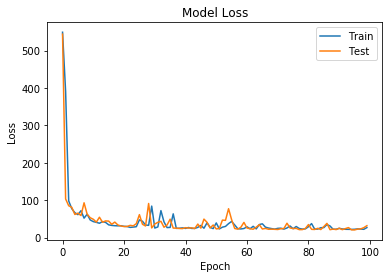

In [72]:
def main():
    Nin = 13
    Nh = 5
    Nout = 1 # 분류가 아니라 회귀이기 때문에 출력 노드수는 1개
    
    model = ANN(Nin, Nh, Nout)
    
    (X_train, y_train), (X_test, y_test) = data_func()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2, 
        verbose=2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))

    plot_loss(history)
    plt.show()
    
if __name__=="__main__":
    main()